In [25]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d
from scipy.spatial import ConvexHull, convex_hull_plot_2d, distance
import matplotlib.ticker as ticker


# Get points from a matrix

In [6]:
def get_points_from_matrix(temp,condition=1, dim_count=3):
    temp_indice_specific = np.where(temp==condition)
    points = []
    if len(temp_indice_specific[0])>0:
        tempsize = temp_indice_specific[0].shape[0]
        if len(temp.shape)==3:
            a = temp_indice_specific[0].reshape(tempsize, 1)
            b = temp_indice_specific[1].reshape(tempsize, 1)
            c =  temp_indice_specific[2].reshape(tempsize, 1)
            points = np.concatenate((a, b, c), axis=1)

        elif dim_count==3:
            a = temp_indice_specific[1].reshape(tempsize, 1)
            b = temp_indice_specific[2].reshape(tempsize, 1)
            c = temp_indice_specific[3].reshape(tempsize, 1)
            points = np.concatenate((a, b, c), axis=1)

        elif dim_count==4:
            a1 = temp_indice_specific[0].reshape(tempsize, 1)
            a = temp_indice_specific[1].reshape(tempsize, 1)
            b = temp_indice_specific[2].reshape(tempsize, 1)
            c = temp_indice_specific[3].reshape(tempsize, 1)
            points = np.concatenate((a1, a, b, c), axis=1)

    return points

## Sample 3D Data (Sphere/Ellipsoid)

In [3]:
def create_shape(center, radius, dimension_mat, shape, filled_val=1):
    for x in range(center[0] - radius[0], center[0] + radius[0] + 1):
      for y in range(center[1] - radius[1], center[1] + radius[1] + 1):
          for z in range(center[2] - radius[2], center[2] + radius[2] + 1):
              if (0<= x and x<= dimension_mat.shape[0]-1) and  (0<= y and y<= dimension_mat.shape[1]-1) and  (0<= z and z<= dimension_mat.shape[2]-1):

                  if shape == 'sphere'  and dimension_mat[x, y, z] == 0 and round(distance.euclidean([x, y, z], center)) <= radius[0]:
                    dimension_mat[x, y, z] = filled_val
                  elif shape == 'ellipsie' and dimension_mat[x, y, z] == 0:
                    a = ((x - center[0]) ** 2) / (radius[0] ** 2)
                    b = ((y - center[1]) ** 2) / (radius[1] ** 2)
                    c = ((z - center[2]) ** 2) / (radius[2] ** 2)
                    if round(a+b+c) <= 1:
                      dimension_mat[x, y, z] = filled_val
    return dimension_mat

In [21]:
dimension_mat = np.zeros((15,15,15))
temp_sphere = create_shape([5,6,5], [4,4,4], dimension_mat, 'sphere', filled_val=1)

dimension_mat2 = np.zeros((15,15,15))
temp_ellipsoid = create_shape([7,6,5], [6,3,2], dimension_mat2, 'ellipsie', filled_val=1)

## Scatter representation

In [12]:
def plot_scatter_3D(temp,set_lim = False, lim = [15,15,15], save = False, views = [], name = ''):
  points = get_points_from_matrix(temp, 1)
  colors_list = ['r','g','b','c', 'm', 'y', 'k', 'navy', 'coral', 'cyan', 'springgreen', 'lightgray']
  fig = plt.figure(figsize=(len(views) * 5, 5))
  for index, view in enumerate(views):
    ax1 = fig.add_subplot(1, len(views), index+1, projection='3d')
    ax1.scatter3D(points[:, 0], points[:, 1], points[:, 2], color=colors_list[0])
    if set_lim:
            ax1.set_xlim(0, lim[0])
            ax1.set_ylim(0, lim[1])
            ax1.set_zlim(0, lim[2])
    if view[0] != -1:
        ax1.view_init(view[0], view[1])
  if save:
      plt.savefig(dir + name + '.png')
  else:
      plt.show()

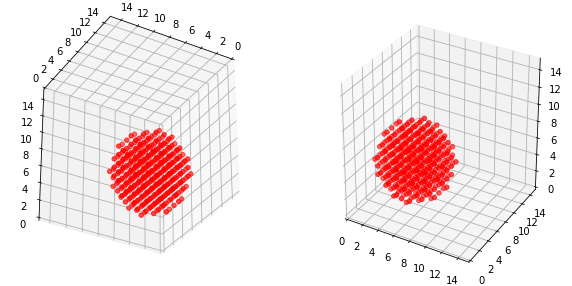

In [23]:
views = [(-30,60), (30,-60)] # The views of illustration
plot_scatter_3D(temp_sphere, set_lim = True, lim = [15,15,15], save = False, views = views, name = '')

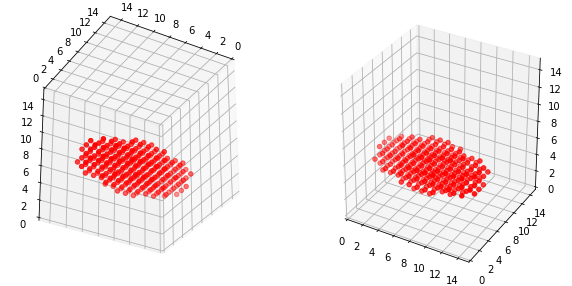

In [24]:
views = [(-30,60), (30,-60)] # The views of illustration
plot_scatter_3D(temp_ellipsoid, set_lim = True, lim = [15,15,15], save = False, views = views, name = '')

## Voxel representation

In [30]:
def plot_voxel_3D(temp,set_lim = False, lim = [15,15,15], save = False, views = [], alpha_v = 0.2, name = ''):
  colors_list = ['r','g','b','c', 'm', 'y', 'k', 'navy', 'coral', 'cyan', 'springgreen', 'lightgray']
  fig = plt.figure(figsize=(len(views) * 5, 5))
  for index, view in enumerate(views):
    ax1 = fig.add_subplot(1, len(views), index+1, projection='3d')
    surf = ax1.voxels(temp, edgecolor='g', facecolors='springgreen', alpha=alpha_v, label=name)
    # Remove the axis ticks
    ax1.xaxis.set_major_locator(ticker.NullLocator())
    ax1.yaxis.set_major_locator(ticker.NullLocator())
    ax1.zaxis.set_major_locator(ticker.NullLocator())
    if set_lim:
            ax1.set_xlim(0, lim[0])
            ax1.set_ylim(0, lim[1])
            ax1.set_zlim(0, lim[2])
    if view[0] != -1:
        ax1.view_init(view[0], view[1])
  if save:
      plt.savefig(dir + name + '.png')
  else:
      plt.show()

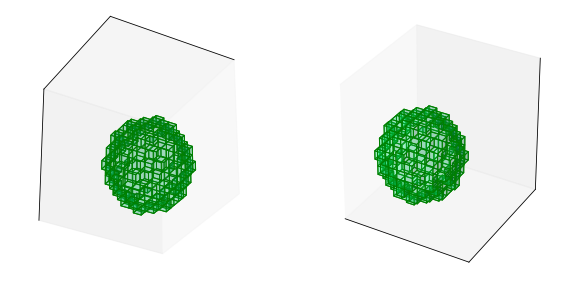

In [31]:
views = [(-30,60), (30,-60)] # The views of illustration
plot_voxel_3D(temp_sphere,set_lim = True, lim = [15,15,15], save = False, views = views, alpha_v = 0.2, name = '')

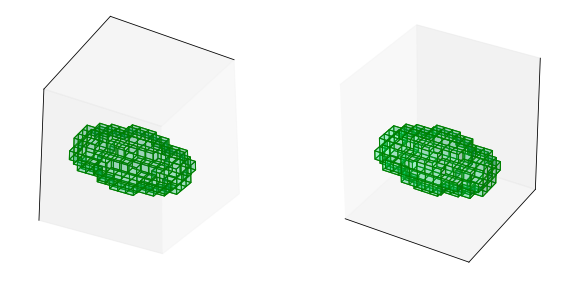

In [32]:
views = [(-30,60), (30,-60)] # The views of illustration
plot_voxel_3D(temp_ellipsoid,set_lim = True, lim = [15,15,15], save = False, views =views, alpha_v = 0.2, name = '')

## Mesh representation

In [33]:
def plot_trisurf_3D(temp,set_lim = False, lim = [15,15,15], save = False, views = [], alpha_v = 0.2, name = ''):
  points = get_points_from_matrix(temp, 1)
  try:
    hull = ConvexHull(points)
    colors_list = ['r','g','b','c', 'm', 'y', 'k', 'navy', 'coral', 'cyan', 'springgreen', 'lightgray']
    fig = plt.figure(figsize=(len(views) * 5, 5))
    for index, view in enumerate(views):
      ax1 = fig.add_subplot(1, len(views), index+1, projection='3d')
      surf = ax1.plot_trisurf(points[:, 0], points[:, 1], points[:, 2],
                                    triangles=hull.simplices,
                                    color='springgreen', alpha=alpha_v, edgecolor='k', label=name)
      # Remove the axis ticks
      ax1.xaxis.set_major_locator(ticker.NullLocator())
      ax1.yaxis.set_major_locator(ticker.NullLocator())
      ax1.zaxis.set_major_locator(ticker.NullLocator())
      if set_lim:
              ax1.set_xlim(0, lim[0])
              ax1.set_ylim(0, lim[1])
              ax1.set_zlim(0, lim[2])
      if view[0] != -1:
          ax1.view_init(view[0], view[1])
    if save:
        plt.savefig(dir + name + '.png')
    else:
        plt.show()
  except:
      print("An exception occurred")
      hull_ratio = None

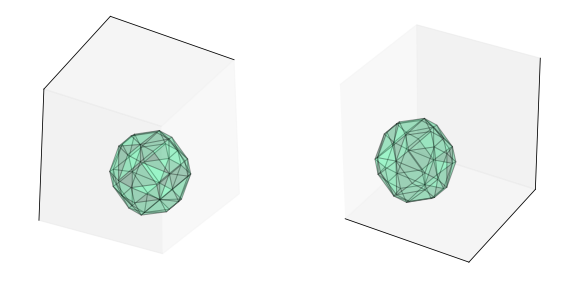

In [35]:
views = [(-30,60), (30,-60)] # The views of illustration
plot_trisurf_3D(temp_sphere,set_lim = True, lim = [15,15,15], save = False, views =views, alpha_v = 0.2, name = '')

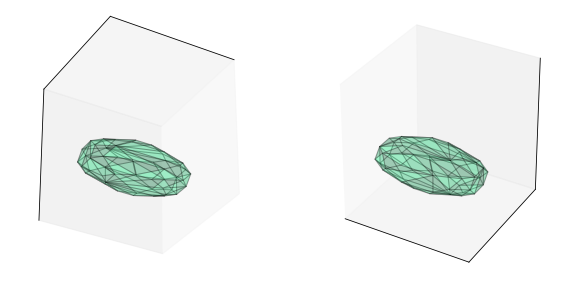

In [34]:
views = [(-30,60), (30,-60)] # The views of illustration
plot_trisurf_3D(temp_ellipsoid,set_lim = True, lim = [15,15,15], save = False, views =views, alpha_v = 0.2, name = '')